<a href="https://colab.research.google.com/github/sujalkumeriya59/Machine-Learning/blob/main/pract_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              Names   Age  ...                      Company  Churn
0  Cameron Williams  42.0  ...                   Harvey LLC      1
1     Kevin Mueller  41.0  ...                   Wilson PLC      1
2       Eric Lozano  38.0  ...  Miller, Johnson and Wallace      1
3     Phillip White  42.0  ...                    Smith Inc      1
4    Cynthia Norton  37.0  ...                   Love-Jones      1

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Compa

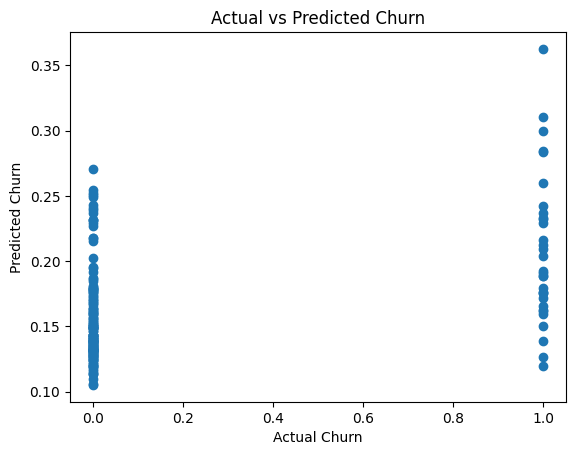

In [17]:
# 1.Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from google.colab import files

# 2.Loading the datset (customer_churn.csv)
df = pd.read_csv('customer_churn.csv')
print(df.head())
print(df.info())

# 3. Data Preprocessing
# Handle missing values in features only
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to features only (excluding 'Churn')
features = df.drop('Churn', axis=1)  # Assuming 'Churn' is your target column
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Replace original features with imputed features
df = pd.concat([features_imputed, df['Churn']], axis=1)

# Check the unique values in the 'Churn' column
print(df['Churn'].unique())

# If 'Churn' is categorical, you may need to convert it to numerical (0 for no churn, 1 for churn)
# Adjust the mapping based on the actual values in your 'Churn' column
# For example, if your 'Churn' column has values 'Yes' and 'No':
# df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# If your 'Churn' column has different values, adjust the mapping accordingly
# For example, if your 'Churn' column has values 1 and 0:
# df['Churn'] = df['Churn'].astype(int)  # No mapping needed, just convert to integer

# Convert categorical variables to numeric if necessary (e.g., using one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

#4. Splitting Data into Features (X) and Target (y)
X = df.drop('Churn', axis=1)  # Features (all columns except 'Churn')
y = df['Churn']  # Target variable ('Churn')

# Check if 'y' has any values before imputation
if y.isnull().all():
    # If 'y' is completely empty, handle the situation appropriately.
    # e.g., raise an error or drop the rows with missing target values.
    raise ValueError("Target variable 'y' is completely empty (all NaN values).")
elif y.empty:
    raise ValueError("Target variable 'y' is empty.")

# If 'y' has some valid values, proceed with imputation if needed
# You can use SimpleImputer to impute missing values with the most frequent value
# Only impute if there are any missing values in 'y'
if y.isnull().any():
    imputer_y = SimpleImputer(strategy='most_frequent') # Create a new imputer for 'y'
    y = imputer_y.fit_transform(y.values.reshape(-1, 1)) # Reshape y to a 2D array for imputation
    y = y.ravel() # Convert back to 1D array


# Optional: Feature Scaling (if needed, for Linear Regression models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# 9. Visualize Predictions vs Actuals (optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn')
plt.title('Actual vs Predicted Churn')
plt.show()

   Churn  Names_Aaron Meyer  ...  Company_Zimmerman Group  Company_Zuniga, Clark and Shaffer
0      1              False  ...                    False                              False
1      1              False  ...                    False                              False
2      1              False  ...                    False                              False
3      1              False  ...                    False                              False
4      1              False  ...                    False                              False

[5 rows x 4932 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Columns: 4932 entries, Churn to Company_Zuniga, Clark and Shaffer
dtypes: bool(4931), int64(1)
memory usage: 4.2 MB
None
Mean Squared Error (MSE): 25.01767202384268
R^2 Score: 0.6588520195508143


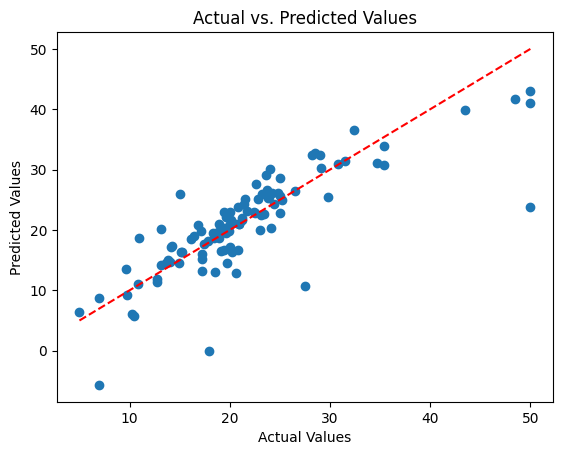

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler  # Optional for scaling
import matplotlib.pyplot as plt

# 1. Load the dataset
data = pd.read_csv('HousingData.csv')
print(df.head())
print(df.info())

# 2. Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent'
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# 3. Split data into features (X) and target (y)
X = data.drop('MEDV', axis=1)  # Replace 'MEDV' with your target variable name
y = data['MEDV']              # Replace 'MEDV' with your target variable name

# 4. Optional: Feature scaling
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

# 9. Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()